In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    df = pd.read_csv('apps.csv')
    print("CSV file loaded successfully!")
    print("First 5 rows of the DataFrame:")
    print(df.head())
except FileNotFoundError:
    print("Error: 'apps.csv' not found. Please ensure the file is in the correct directory or provide the full path.")
    # Exit or handle the error appropriately if the file isn't found
    exit()

CSV file loaded successfully!
First 5 rows of the DataFrame:
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159   19M      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967   14M     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510  8.7M   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644   25M  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967  2.8M     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   Janu

In [3]:
df.columns = df.columns.str.strip().str.replace('[^A-Za-z0-9_]+', '', regex=True)


In [4]:
df.dropna(subset=['App'], inplace=True)


In [5]:
def get_sentiment(text):
    if isinstance(text, str): # Ensure the input is a string
        analysis = TextBlob(text)
        return analysis.sentiment.polarity, analysis.sentiment.subjectivity
    return None, None

In [6]:
print("\nPerforming sentiment analysis on 'App' column...")
df['App_Polarity'], df['App_Subjectivity'] = zip(*df['App'].apply(get_sentiment))
print("Sentiment analysis complete.")


Performing sentiment analysis on 'App' column...
Sentiment analysis complete.


In [7]:
print("\n--- Sentiment Analysis Results ---")
print("\nDescriptive statistics for App Polarity:")
print(df['App_Polarity'].describe())
print("\nDescriptive statistics for App Subjectivity:")
print(df['App_Subjectivity'].describe())


--- Sentiment Analysis Results ---

Descriptive statistics for App Polarity:
count    9659.000000
mean        0.037492
std         0.157577
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: App_Polarity, dtype: float64

Descriptive statistics for App Subjectivity:
count    9659.000000
mean        0.111973
std         0.251991
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: App_Subjectivity, dtype: float64


In [8]:
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
df['App_Sentiment_Category'] = df['App_Polarity'].apply(classify_sentiment)
print("\nSentiment distribution for App names:")
print(df['App_Sentiment_Category'].value_counts())


Sentiment distribution for App names:
App_Sentiment_Category
Neutral     7885
Positive    1400
Negative     374
Name: count, dtype: int64


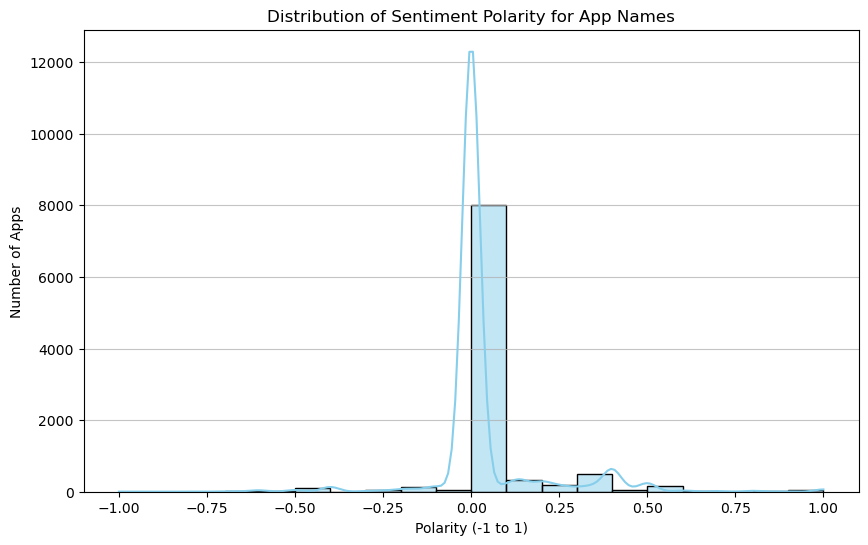

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['App_Polarity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Polarity for App Names')
plt.xlabel('Polarity (-1 to 1)')
plt.ylabel('Number of Apps')
plt.grid(axis='y', alpha=0.75)
plt.show()

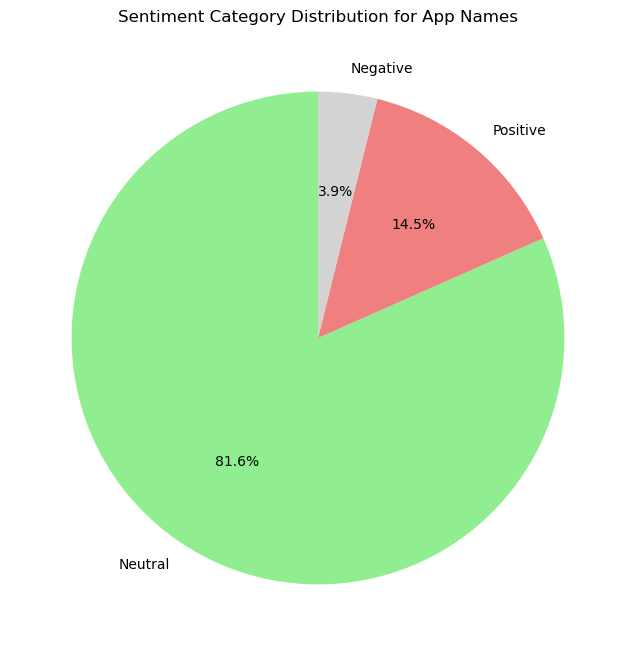

In [10]:
plt.figure(figsize=(8, 8))
df['App_Sentiment_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral', 'lightgray'])
plt.title('Sentiment Category Distribution for App Names')
plt.ylabel('') # Hide the default 'count' label
plt.show()

In [11]:
print("\n--- Examples of Apps by Sentiment Category ---")
print("\nTop 5 Positive Apps:")
print(df[df['App_Sentiment_Category'] == 'Positive'][['App', 'App_Polarity']].head())
print("\nTop 5 Negative Apps:")
print(df[df['App_Sentiment_Category'] == 'Negative'][['App', 'App_Polarity']].head())
print("\nTop 5 Neutral Apps:")
print(df[df['App_Sentiment_Category'] == 'Neutral'][['App', 'App_Polarity']].head())


--- Examples of Apps by Sentiment Category ---

Top 5 Positive Apps:
                                                  App  App_Polarity
2   U Launcher Lite – FREE Live Cool Themes, Hide ...      0.295455
9                       Kids Paint Free - Drawing Fun      0.350000
29                    Easy Realistic Drawing Tutorial      0.300000
33                                 Easy Origami Ideas      0.433333
34                                    I Creative Idea      0.500000

Top 5 Negative Apps:
                                      App  App_Polarity
20            Logo Maker - Small Business      -0.25000
30         Pink Silver Bow Keyboard Theme      -0.10000
41           Sad Poetry Photo Frames 2018      -0.50000
47  Little Teddy Bear Colouring Book Game      -0.29375
57             Extreme Rally Championship      -0.12500

Top 5 Neutral Apps:
                                              App  App_Polarity
0  Photo Editor & Candy Camera & Grid & ScrapBook           0.0
1              


Average App Polarity by App Category:
Category
COMICS                 0.166518
DATING                 0.099622
HOUSE_AND_HOME         0.078295
BEAUTY                 0.066467
ENTERTAINMENT          0.066009
WEATHER                0.065995
FOOD_AND_DRINK         0.062098
COMMUNICATION          0.056756
SOCIAL                 0.055429
PERSONALIZATION        0.055042
AUTO_AND_VEHICLES      0.053831
PHOTOGRAPHY            0.053079
TOOLS                  0.050358
BOOKS_AND_REFERENCE    0.045828
SPORTS                 0.045545
HEALTH_AND_FITNESS     0.045047
TRAVEL_AND_LOCAL       0.042936
LIFESTYLE              0.039749
EVENTS                 0.038157
EDUCATION              0.037631
SHOPPING               0.035988
PARENTING              0.035972
VIDEO_PLAYERS          0.033812
NEWS_AND_MAGAZINES     0.032686
FINANCE                0.028770
BUSINESS               0.028396
PRODUCTIVITY           0.025013
FAMILY                 0.024769
MAPS_AND_NAVIGATION    0.016888
MEDICAL                0

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4516\1324107500.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby('Category')['App_Polarity'].mean().sort_values(ascending=False).index,


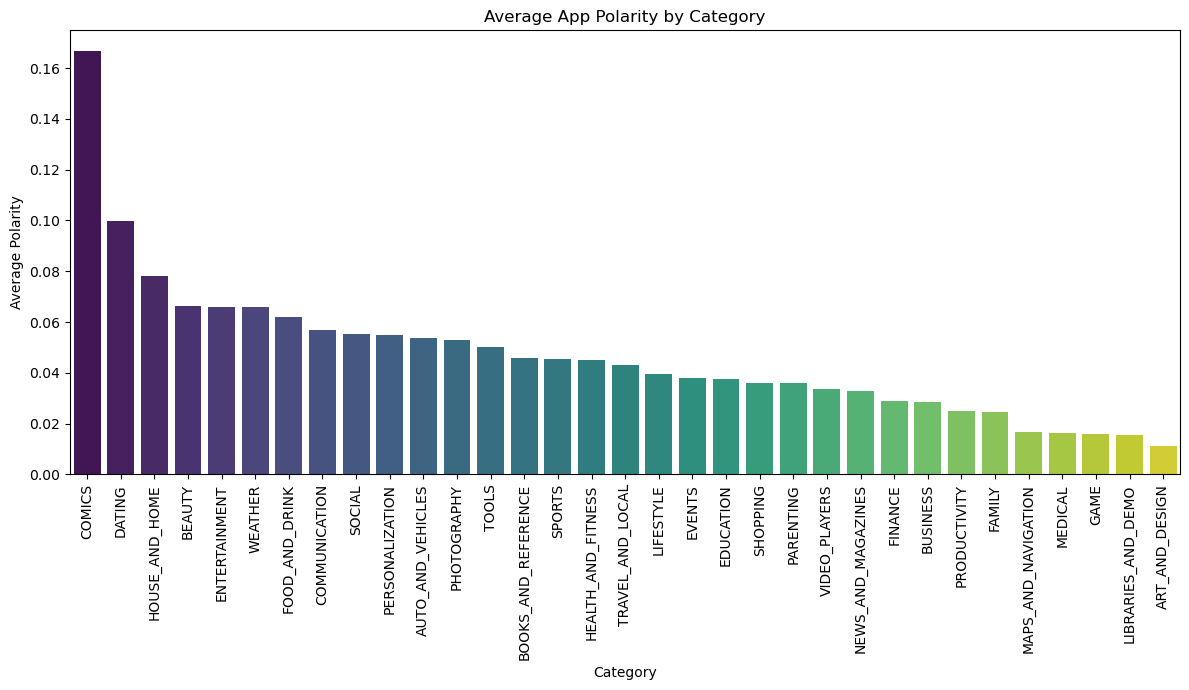

In [12]:
if 'Category' in df.columns:
    print("\nAverage App Polarity by App Category:")
    print(df.groupby('Category')['App_Polarity'].mean().sort_values(ascending=False))
    plt.figure(figsize=(12, 7))
    sns.barplot(x=df.groupby('Category')['App_Polarity'].mean().sort_values(ascending=False).index,
                y=df.groupby('Category')['App_Polarity'].mean().sort_values(ascending=False).values,
                palette='viridis')
    plt.title('Average App Polarity by Category')
    plt.xlabel('Category')
    plt.ylabel('Average Polarity')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("\n'Category' column not found for further grouping analysis.")